## Fragmentation in Fu 2016 ancient DNA data

We interpret fragmentation patterns in Fu et al 2016 aDNA data. 

In [1]:
files <- list.files("../data/Fu_2016/")
dir <- "../data/Fu_2016/"
tab <- list()
for(l in files){
  tab[[l]] <- read.csv(paste0(dir, l), header=FALSE)
  cat("We are at sample", l, "\n")
}

We are at sample AfontovaGora3.archaic.q30.csv 
We are at sample BerryAuBac.q30.csv 
We are at sample Bockstein.q30.csv 
We are at sample Chaudardes1.q30.csv 
We are at sample Cioclovina1.q30.csv 
We are at sample Continenza.archaic.q30.csv 
We are at sample Continenza.q30.csv 
We are at sample ElMiron.archaic.q30.csv 
We are at sample ElMiron.q30.csv 
We are at sample GoyetQ116-1.q30.csv 
We are at sample GoyetQ376-19.q30.csv 
We are at sample GoyetQ53-1.q30.csv 
We are at sample GoyetQ56-16.q30.csv 
We are at sample HohleFels49.q30.csv 
We are at sample Kostenki12.archaic.q30.csv 
We are at sample Kostenki12.q30.csv 
We are at sample Kostenki14.archaic.q30.csv 
We are at sample Kostenki14.q30.csv 
We are at sample KremsWA3.q30.csv 
We are at sample Muierii.archaic.q30.csv 
We are at sample Muierii2.q30.csv 
We are at sample Ofnet.q30.csv 
We are at sample Ostuni1.archaic.q30.csv 
We are at sample Ostuni1.q30.csv 
We are at sample Ostuni2.archaic.q30.csv 
We are at sample Ostuni2.q30.

In [2]:
ancient_names <- as.character(sapply(files, function(x) return(strsplit(x, "[_]")[[1]][1])))

we are at sample 1 
we are at sample 2 
we are at sample 3 
we are at sample 4 
we are at sample 5 
we are at sample 6 
we are at sample 7 
we are at sample 8 
we are at sample 9 
we are at sample 10 
we are at sample 11 
we are at sample 12 
we are at sample 13 
we are at sample 14 
we are at sample 15 
we are at sample 16 
we are at sample 17 


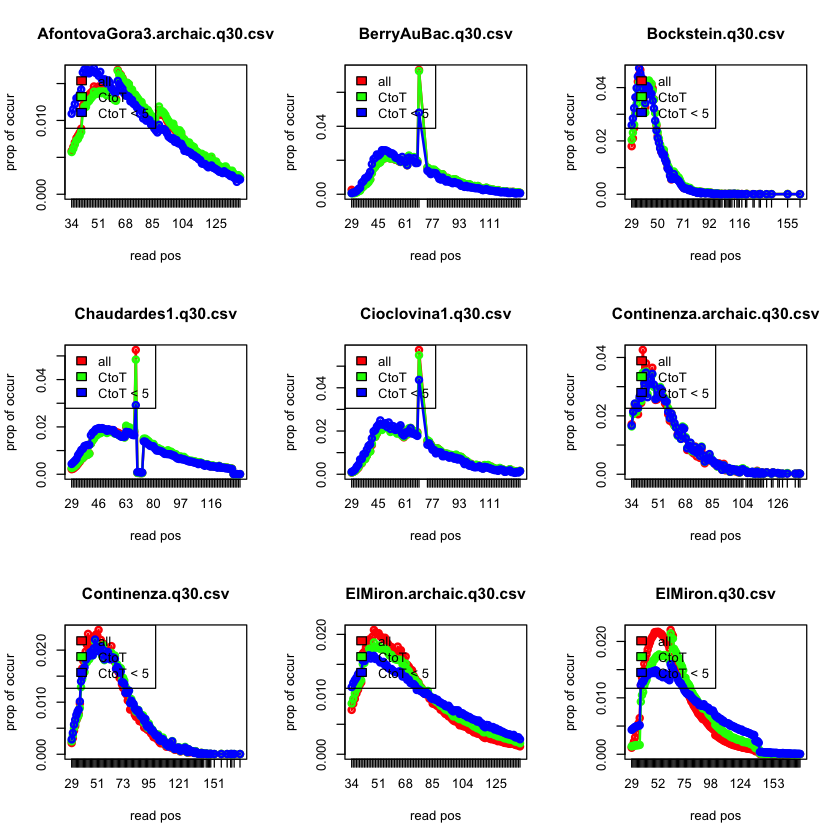

we are at sample 18 
we are at sample 19 
we are at sample 20 
we are at sample 21 
we are at sample 22 
we are at sample 23 
we are at sample 24 
we are at sample 25 
we are at sample 26 


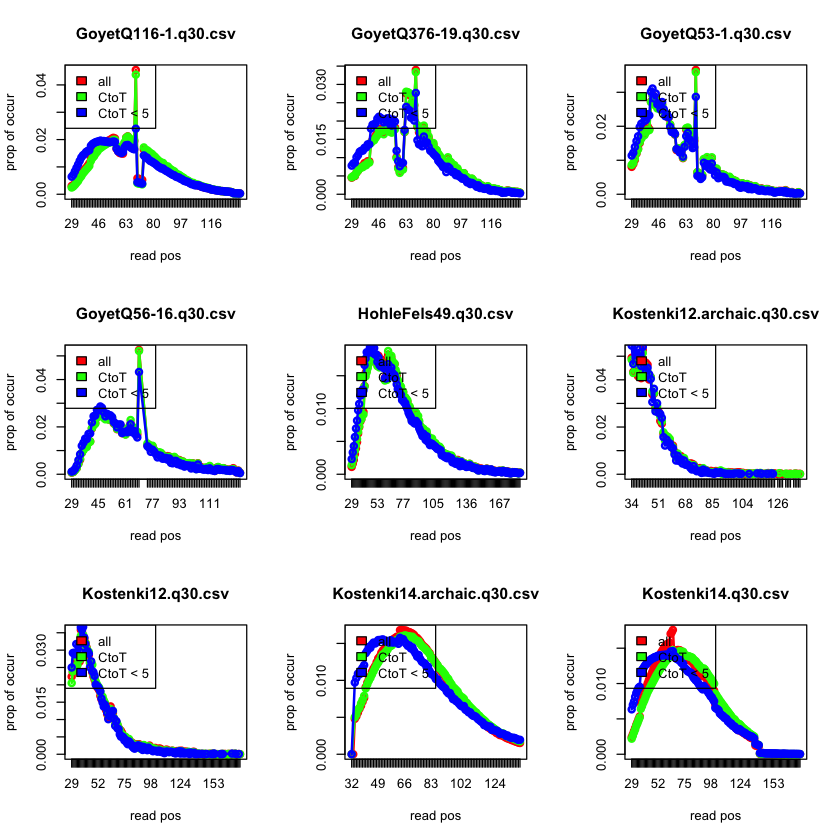

we are at sample 27 
we are at sample 28 
we are at sample 29 
we are at sample 30 
we are at sample 31 
we are at sample 32 
we are at sample 33 
we are at sample 34 
we are at sample 35 


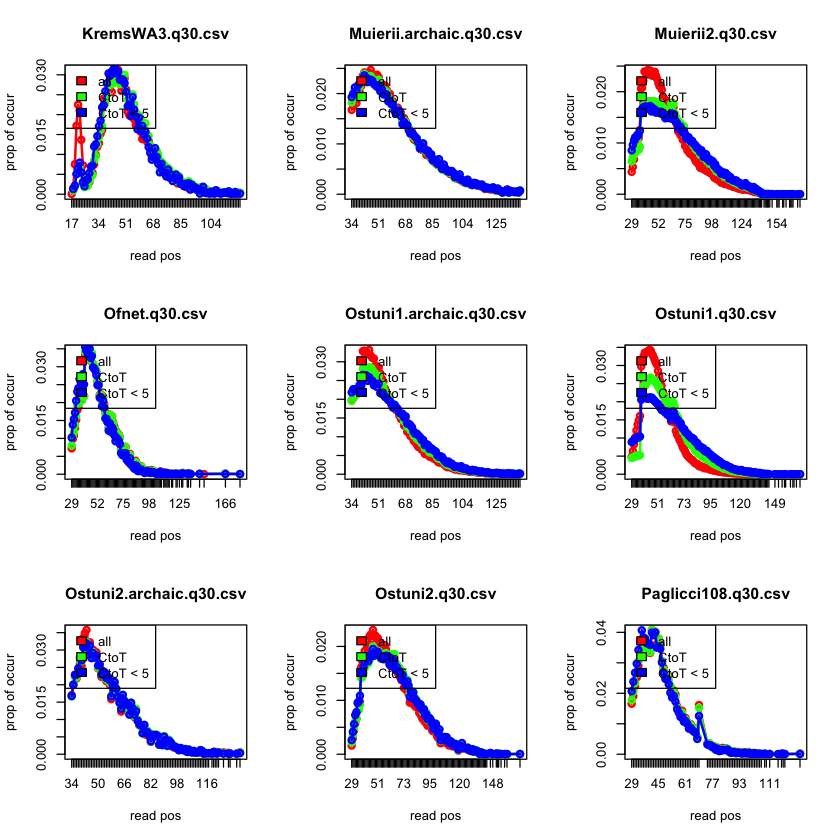

we are at sample 36 
we are at sample 37 
we are at sample 38 
we are at sample 39 
we are at sample 40 
we are at sample 41 
we are at sample 42 
we are at sample 43 
we are at sample 44 


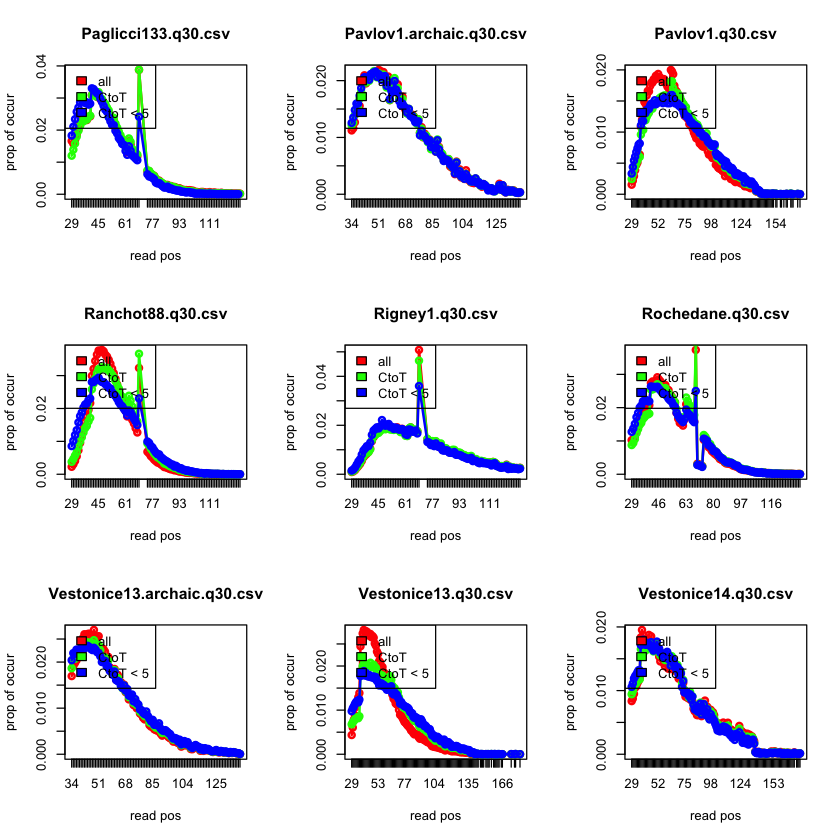

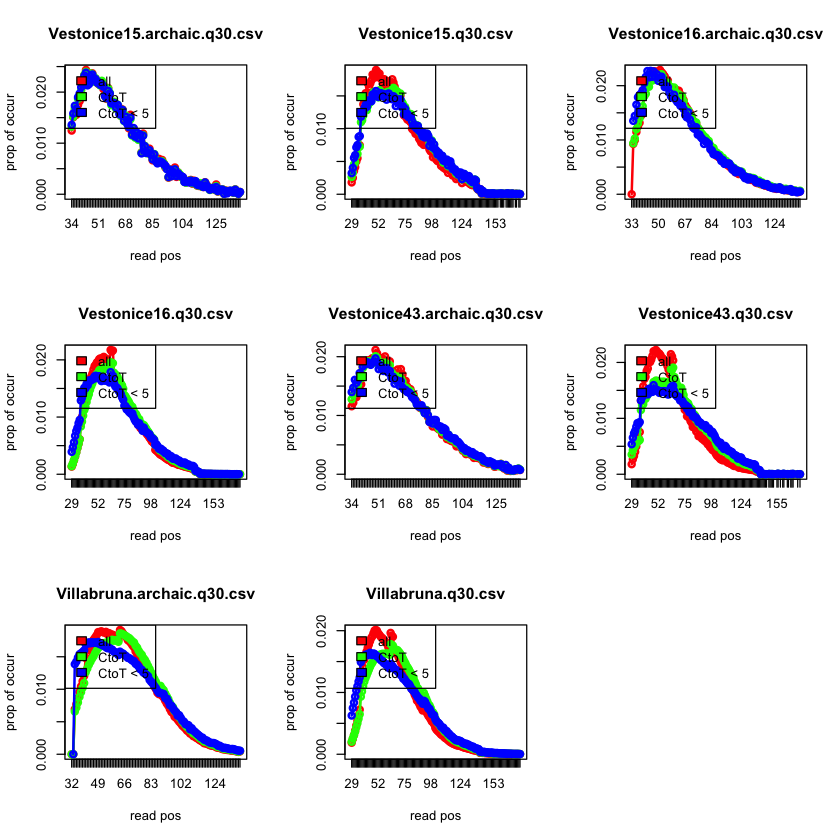

In [3]:
par(mfrow=c(3,3))
for(l in 1:length(tab)){
  tab1 <- tab[[l]]
  read_length <- tab1$V2 + tab1$V3
  indices <- grep("C->T", tab1$V1)
  indices <- c(indices, grep("G->A", tab1$V1))
  read_length_CtoT <- tab1[indices, ]$V2 + tab1[indices, ]$V3 ## read lengths for all C to T
  indices2 <- which(tab1$V2 < 5 | tab1$V3 < 5)
  indices_matched <- intersect(indices, indices2)
  read_length_3 <- (tab1[indices_matched, ]$V2 + tab1[indices_matched, ]$V3)
  plot(table(read_length)/sum(table(read_length)), type="o", col="red",
       main=paste0(ancient_names[l]), xlab="read pos", ylab="prop of occur")
  points(table(read_length_CtoT)/sum(table(read_length_CtoT)), type="o", col="green")
  points(table(read_length_3)/ sum(table(read_length_3)), type="o", col="blue")
  legend("topleft", fill=c("red", "green", "blue"), legend = c("all", "CtoT", "CtoT < 5"))
  cat("we are at sample", l, "\n")
}

We find here that the read length distribution has a mode around 50 for almost all samples (which may be because of the library prep), however offshoots are seen in s afew samples like Rigney, Goyet and Cioclovina samples.

Surprisingly, unlike the other ancient samples where the the read length distribution for reads with C to T changes in the first 5 positions (in other words, damaged reads) is usually slightly more concentrated towards lower fragment sizes compared to all reads, here we see a number of cases, for example - Villabruna, Vestonice, ElMiron etc - where the opposite happens. 

This raises questions about contamination of modern samples in some of these samples.